adaa
ß


hsjs

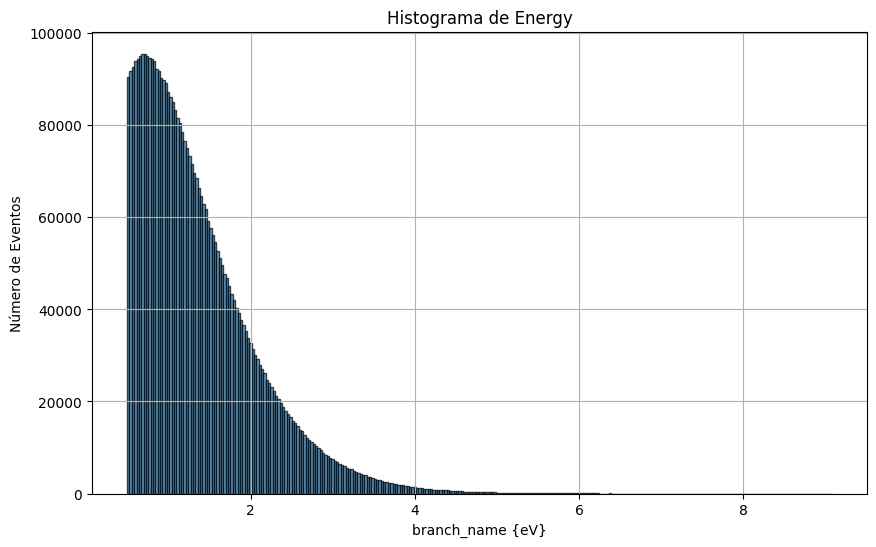

In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
file_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\build\\Release\\Sim0.root'      # Ruta al archivo ROOT
tree_name = 'G4_PCM'        # Nombre del árbol
branch_name = 'Energy'      # Nombre de la categoría

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Crea el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(df[branch_name].dropna(), bins=300, edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {branch_name}')
    plt.xlabel('branch_name {eV}')
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()


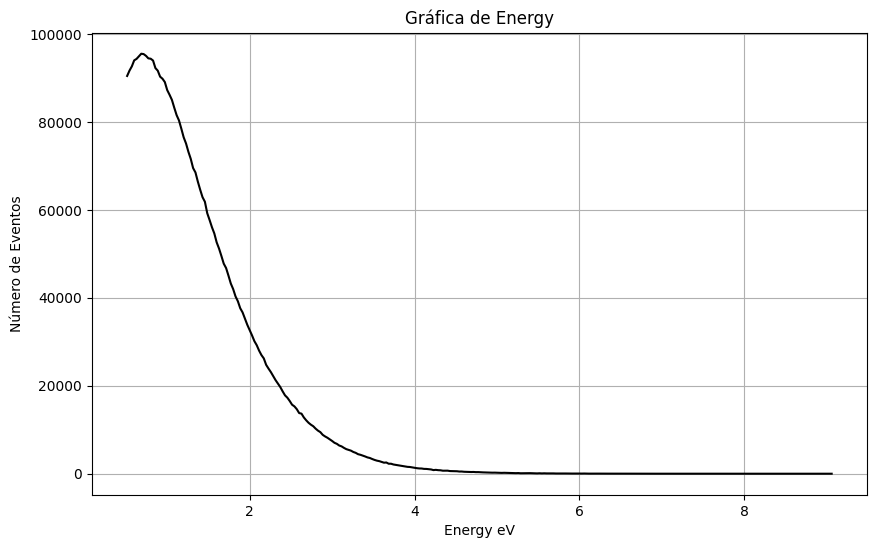

In [6]:

# Parámetros
file_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\build\\Release\\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma
    data = df[branch_name].dropna()
    counts, bins = np.histogram(data, bins=300)

    # Calcula el centro de cada bin
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Crea la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, counts, linestyle='-', color='black')
    plt.title(f'Gráfica de {branch_name}')
    plt.xlabel(f'{branch_name} eV')
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()


In [50]:
bin_centers

array([1.99260374e-06, 2.43540323e-06, 2.87820272e-06])

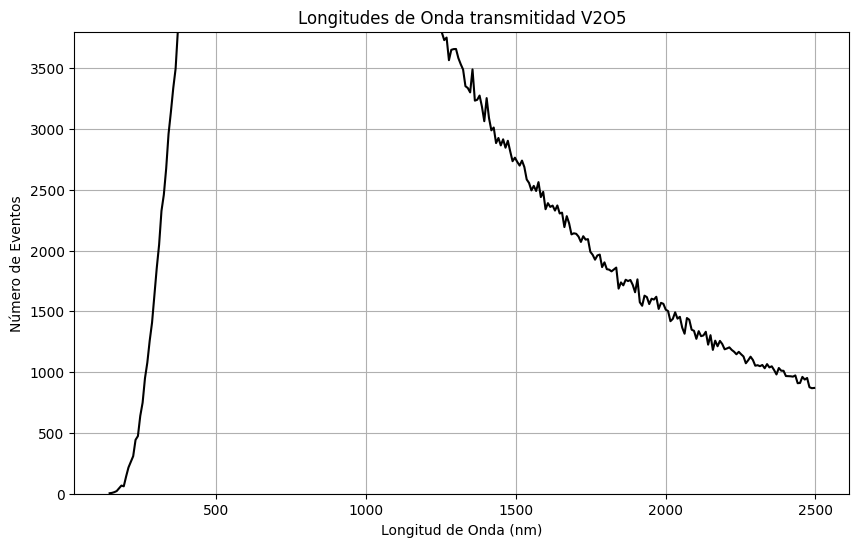

In [4]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
file_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\build\\Release\\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Constantes
eV_to_nm = 1240  # Constante para la conversión de eV a nm

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma
    data = df[branch_name].dropna()

    # Convertir energía (eV) a longitud de onda (nm)
    wavelengths = eV_to_nm / data

    # Calcula el histograma
    counts, bins = np.histogram(wavelengths, bins=300)

    # Calcula el centro de cada bin
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Crea la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, counts, linestyle='-', color='black')
    plt.title('Longitudes de Onda transmitidad V2O5')
    plt.xlabel('Longitud de Onda (nm)')
    plt.ylabel('Número de Eventos')
    plt.grid(True)

    # # Configurar escalas logarítmicas
    # plt.xscale('log')
    # plt.yscale('log')

    plt.ylim(0,3800)

    plt.show()


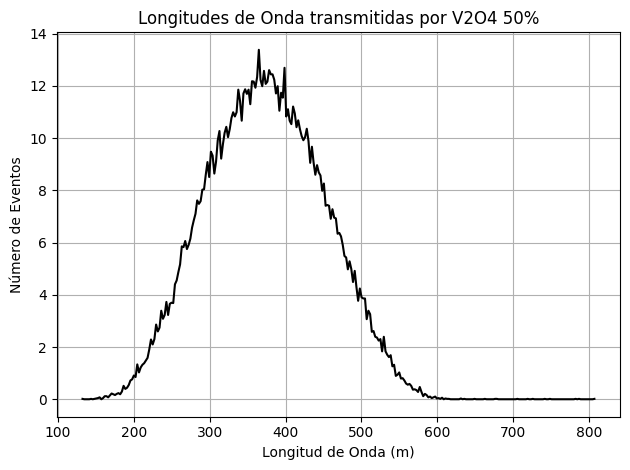

In [11]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
file_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git\\G4-PCM\\build\\Release\\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Constante para la conversión de eV a nm
eV_to_nm = 1240  

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma de energía
    data = df[branch_name].dropna()
    counts_energy, bins_energy = np.histogram(data, bins=300)
    bin_centers_energy = (bins_energy[:-1] + bins_energy[1:]) / 2

    # Convierte energía (eV) a longitud de onda (nm)
    wavelengths = eV_to_nm / data
    counts_wavelength, bins_wavelength = np.histogram(wavelengths, bins=300)
    bin_centers_wavelength = (bins_wavelength[:-1] + bins_wavelength[1:]) / 2

    # Crea la figura y las subgráficas
    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    fig, (ax2) = plt.subplots(1, 1)

    # # Primera gráfica (Energía)
    # ax1.plot(bin_centers_energy, counts_energy, linestyle='-', color='black')
    # ax1.set_title(f'Gráfica de {branch_name}')
    # ax1.set_xlabel(branch_name)
    # ax1.set_ylabel('Número de Eventos')
    # ax1.grid(True)

    # Segunda gráfica (Longitud de onda)
    norm_wl = counts_wavelength*100/6817
    ax2.plot(bin_centers_wavelength, norm_wl, linestyle='-', color='black')
    ax2.set_title('Longitudes de Onda transmitidas por V2O4 50%')
    ax2.set_xlabel('Longitud de Onda (m)')
    ax2.set_ylabel('Número de Eventos')
    ax2.grid(True)

    # Muestra la figura
    plt.tight_layout()
    plt.show()


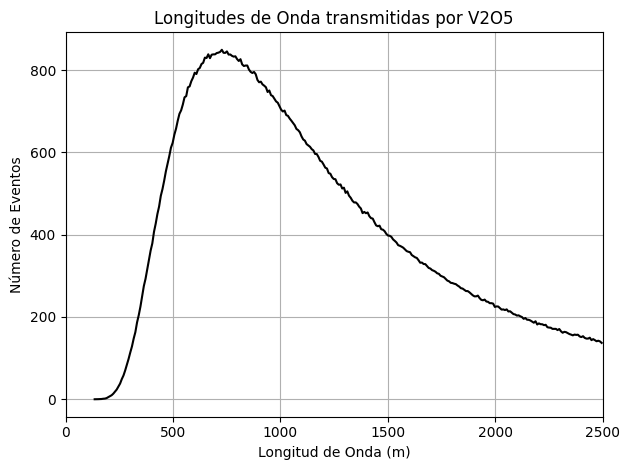

In [21]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
file_path = 'C:\\Users\\conej\\Documents\\Universidad\\Geant4\\Projects\\Git2\\G4-PCM\\build\\Release\\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Constante para la conversión de eV a nm
eV_to_nm = 1240  

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma de energía
    data = df[branch_name].dropna()
    counts_energy, bins_energy = np.histogram(data, bins=300)
    bin_centers_energy = (bins_energy[:-1] + bins_energy[1:]) / 2

    # Convierte energía (eV) a longitud de onda (nm)
    wavelengths = eV_to_nm / data
    counts_wavelength, bins_wavelength = np.histogram(wavelengths, bins=300)
    bin_centers_wavelength = (bins_wavelength[:-1] + bins_wavelength[1:]) / 2

    # Crea la figura y las subgráficas
    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    fig, (ax2) = plt.subplots(1, 1)

    # # Primera gráfica (Energía)
    # ax1.plot(bin_centers_energy, counts_energy, linestyle='-', color='black')
    # ax1.set_title(f'Gráfica de {branch_name}')
    # ax1.set_xlabel(branch_name)
    # ax1.set_ylabel('Número de Eventos')
    # ax1.grid(True)

    # Segunda gráfica (Longitud de onda)
    # norm_wl = counts_wavelength*100/max(counts_wavelength)
    norm_wl = counts_wavelength*100/6817
    ax2.plot(bin_centers_wavelength, norm_wl, linestyle='-', color='black')
    ax2.set_title('Longitudes de Onda transmitidas por V2O5')
    ax2.set_xlabel('Longitud de Onda (m)')
    ax2.set_ylabel('Número de Eventos')
    ax2.grid(True)
    ax2.set_xlim(0,2500)

    # Muestra la figura
    plt.tight_layout()
    plt.show()
